In [1]:
import cv2 as cv
import numpy as np
import os
import re

In [2]:
path = 'D:/NMIMS Semester III/Deep Learning/Dataset/'
reg_exp = r'[a-z0-9A-Z]+'
reg_exp_1 = r'[0-9]+.[0-9]+'

In [3]:
classes = {'Book':0, 'Laptop':1, 'Mobile phone':2}

In [4]:
images = []
labels = []

def load_data(path):
    for folder in os.listdir(path):
        for folders in os.listdir(path + folder + '/'):
            for files in os.listdir(path + folder + '/' + folders + '/'):
                if files.endswith('.txt'):
                    req_image_name = re.findall(reg_exp, files)[0]
                    image = cv.imread(path + folder + '/' + folders + '/' + req_image_name + '.jpg')
                    with open(path + folder + '/' + folders + '/' + files, 'r') as f:
                        record = f.read().split('\n')
                        for element in record:
                            if len(element) == 0:
                                continue
                            num_elem = re.findall(reg_exp_1, element)
                            req_img = image[int(float(num_elem[1])):int(float(num_elem[3])), int(float(num_elem[0])):int(float(num_elem[2]))]
                            req_img = cv.resize(req_img, (80, 80))
                            req_img = cv.cvtColor(req_img, cv.COLOR_BGR2GRAY)
                            req_img = req_img.astype('float32')/255.0
                            label = classes[folders]
                            images.append(req_img)
                            labels.append(label)
    images_r = np.array(images)
    labels_r = np.array(labels)
    return images_r, labels_r

In [5]:
images, labels = load_data(path)

In [6]:
images.shape, labels.shape

((60668, 80, 80), (60668,))

0


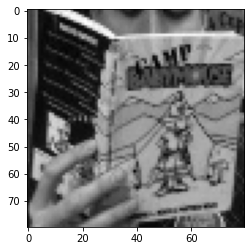

In [7]:
import matplotlib.pyplot as plt

print(labels[0])
plt.imshow(images[0], cmap='gray')

0


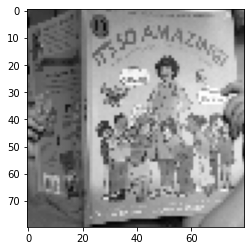

In [8]:
print(labels[3000])
plt.imshow(images[3000], cmap='gray')

In [9]:
images = images.reshape((images.shape[0], 80, 80, 1))

In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.1, random_state=123)

In [12]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(54601, 80, 80, 1) (6067, 80, 80, 1) (54601, 3) (6067, 3)


In [13]:
del images
del labels

In [14]:
from tensorflow.keras.layers import Conv2D, Flatten, Input, Dense, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()
model.add(Input((80, 80, 1)))

model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(256, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())

model.add(Dense(1024, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(3, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 80, 80, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 80, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 40, 40, 128)       5

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, Y_train_req, validation_split=0.1, batch_size=32, epochs=10)

Train on 49140 samples, validate on 5461 samples
Epoch 1/10
49140/49140 [==============================] - 3146s 64ms/sample - loss: 0.5737 - accuracy: 0.7795 - val_loss: 0.6079 - val_accuracy: 0.7797
Epoch 2/10
49140/49140 [==============================] - 3103s 63ms/sample - loss: 0.4231 - accuracy: 0.8413 - val_loss: 0.4142 - val_accuracy: 0.8476
Epoch 3/10
49140/49140 [==============================] - 3102s 63ms/sample - loss: 0.3598 - accuracy: 0.8671 - val_loss: 0.5713 - val_accuracy: 0.7713
Epoch 4/10
49140/49140 [==============================] - 3099s 63ms/sample - loss: 0.3178 - accuracy: 0.8838 - val_loss: 0.4492 - val_accuracy: 0.8160
Epoch 5/10
49140/49140 [==============================] - 3099s 63ms/sample - loss: 0.2835 - accuracy: 0.8972 - val_loss: 0.5432 - val_accuracy: 0.7574
Epoch 6/10
49140/49140 [==============================] - 3099s 63ms/sample - loss: 0.2515 - accuracy: 0.9099 - val_loss: 0.2729 - val_accuracy: 0.9018
Epoch 7/10
49140/49140 [===============

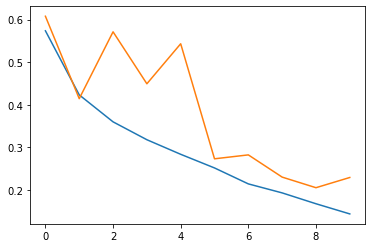

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

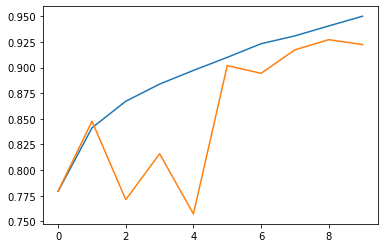

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [21]:
model.evaluate(X_test, Y_test_req)

6067/6067 [==============================] - 110s 18ms/sample - loss: 0.2213 - accuracy: 0.9242


[0.22126094217117287, 0.92418]